# Task 4.10 Coding Etiquette & Excel Reporting

# 1 Importing Libraries and Data

In [1]:
# Importing libraries and data
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/melanie/Desktop/7:2022 Instacart Basket Analysis'

In [3]:
df_merged = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_final.pkl'))

# Data Checks

In [4]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependents,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


# Addressing Privacy Concerns

In [5]:
# Looking for PII columns
df_merged.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range', 'price_range_loc',
       ' price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spending_flag', 'median_order_duration',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'dependents', 'marital_status', 'income'],
      dtype='object')

There is PII in the data to include customer names. We can drop these columns to keep customers' privacy. The user_id column should be unique enough to identify each customer. 

In [6]:
# Dropping columns
df_merged.drop(columns =['first_name', 'last_name'], inplace=True, axis=1)

In [7]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,median_order_duration,frequency_flag,gender,state,age,date_joined,dependents,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,High spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,High spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,High spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


# Splitting States into Regions

In [8]:
# States for Northwest region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [9]:
# States for Midwest region
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 
           'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missiouri']

In [10]:
# States for South region
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee',
'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [11]:
# States for West region
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Loop statement for regions
result = []
for value in df_merged['state']:
    if value in Northeast:
        result.append('Northeast')
    elif value in Midwest:
        result.append('Midwest')
    elif value in South:
        result.append('South')
    else:
        result.append('West')

In [13]:
# Including column in dataset
df_merged['region'] = result

In [14]:
df_merged['region'].value_counts()

South        10801195
West          8941425
Midwest       6962266
Northeast     5728144
Name: region, dtype: int64

# Determining difference in spending habits among regions

In [15]:
# Finding min, mean, max for prices among regions
df_merged.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.627875  1.0  99999.0
Northeast  11.556554  1.0  99999.0
South      12.196474  1.0  99999.0
West       11.490124  1.0  99999.0

All of the mean values are similar among regions. 

# Creating an exclusion flag for low spending customers

In [16]:
# Creating an exclusion flag 
result2 = []
for total in df_merged['max_order']:
    if total < 5:
        result2.append('Low activity')
    else: 
        result2.append('Regular activity')

In [17]:
df_merged['activity_flag'] = result2

In [18]:
df_merged['activity_flag'].value_counts(dropna = False)

Regular activity    30991542
Low activity         1441488
Name: activity_flag, dtype: int64

In [19]:
# Getting rid of low activity customers 
reg_customers = df_merged[df_merged.activity_flag != 'Low activity']

In [20]:
# Checking the new shape of the database
reg_customers.shape

(30991542, 33)

In [21]:
# Comparing with original shape of database
df_merged.shape

(32433030, 33)

In [22]:
#Checking to make sure all low activity customers are gone
32433030-30991452

1441578

In [23]:
# Exporting regular customers database
reg_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'reg_customers.pkl'))

# Creating Character Profiles

# Age Group Flag

In [24]:
# Creating an age profile for young adult, 18-25
df_merged.loc[df_merged['age'] <= 25 , 'age_group'] = 'Young adult'

In [25]:
# Creating an age profile for adult, 26-45
df_merged.loc[(df_merged['age'] >=26) & (df_merged['age'] <= 45), 'age_group'] = 'Adult'

In [26]:
# Creating an age profile for middle aged adult, 46-55
df_merged.loc[(df_merged['age'] >= 46) & (df_merged['age'] <=55), 'age_group'] = 'Middle Aged Adult'

In [27]:
# Creating an age profile for senior adult, 56 and older
df_merged.loc[df_merged['age'] >= 56, 'age_group'] = 'Senior'

In [28]:
df_merged['age_group'].value_counts(dropna = False)

Senior               13103551
Adult                10164587
Middle Aged Adult     5116035
Young adult           4048857
Name: age_group, dtype: int64

# Income Flag

In [29]:
# Creating ranges for income
income_group = []

for value in df_merged['income']:
    if value < 36000:
        income_group.append('Low income')
    elif (value > 36000) and (value < 75000):
        income_group.append('Middle income')
    else:
        income_group.append('High income')

In [30]:
# Applying conditions to database
df_merged['income_group'] = income_group

In [31]:
# Checking conditions of income groups
df_merged['income_group'].value_counts()

High income      21980635
Middle income     9345815
Low income        1106580
Name: income_group, dtype: int64

# Dependent Flag

In [32]:
# Creating a dependent flag
df_merged.loc[df_merged['dependents'] == 0 , 'dependent_flag'] = 'No dependents'

In [33]:
df_merged.loc[df_merged['dependents'] > 0, 'dependent_flag'] = 'Parent/Guardian'

In [34]:
df_merged['dependent_flag'].value_counts(dropna=False)

Parent/Guardian    24328189
No dependents       8104841
Name: dependent_flag, dtype: int64

# Department Flag

In [35]:
# Importing departments csv file
df_dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=0)

In [36]:
df_dept

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [37]:
# Create a department flag for each department type
dept_type = []
for value in df_merged['department_id']:
    if value == 1:
        dept_type.append('frozen')
    elif value == 2:
        dept_type.append('other')
    elif value == 3:
        dept_type.append('bakery')
    elif value == 4:
        dept_type.append('produce')
    elif value == 5:
        dept_type.append('alcohol')
    elif value == 6:
        dept_type.append('international')
    elif value == 7:
        dept_type.append('business')
    elif value == 8:
        dept_type.append('pets')
    elif value == 9:
        dept_type.append('dry goods pasta')
    elif value == 10:
        dept_type.append('bulks')
    elif value == 11:
        dept_type.append('personal care')
    elif value == 12:
        dept_type.append('meat seafood')
    elif value == 13:
        dept_type.append('pantry')
    elif value == 14:
        dept_type.append('breakfast')
    elif value == 15:
        dept_type.append('canned goods')
    elif value == 16:
        dept_type.append('dairy eggs')
    elif value == 17:
        dept_type.append('household')
    elif value == 18:
        dept_type.append('babies')
    elif value == 19:
        dept_type.append('snacks')
    elif value == 20:
        dept_type.append('deli')
    elif value == 21:
        dept_type.append('missing')

In [38]:
# Applying conditions to database
df_merged['dept_type'] = dept_type

In [39]:
df_merged['dept_type'].value_counts()

produce            9479291
dairy eggs         5414016
snacks             2887550
business           2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447634
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulks                34573
Name: dept_type, dtype: int64

In [40]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,dependents,marital_status,income,region,activity_flag,age_group,income_group,dependent_flag,dept_type
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,Regular activity,Senior,Middle income,Parent/Guardian,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,Midwest,Regular activity,Senior,Middle income,Parent/Guardian,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,Midwest,Regular activity,Senior,Middle income,Parent/Guardian,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8/1/2019,1,married,49620,Midwest,Regular activity,Senior,Middle income,Parent/Guardian,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8/1/2019,1,married,49620,Midwest,Regular activity,Senior,Middle income,Parent/Guardian,bulks


# Visualizations for Distribution of Profiles

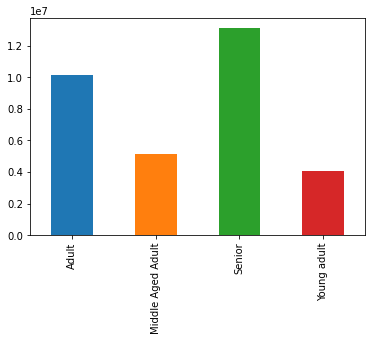

In [41]:
# Creating a bar chart for age groups
age_bar = df_merged['age_group'].value_counts().sort_index().plot.bar(color = sns.color_palette('tab10'))

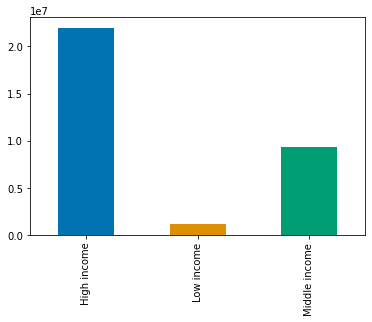

In [42]:
# Creating a bar chart for income 
income_bar = df_merged['income_group'].value_counts().sort_index().plot.bar(color = sns.color_palette('colorblind'))

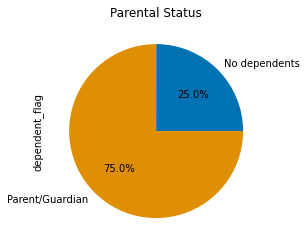

In [43]:
# Pie chart representing parental status
pstatus_pie = df_merged['dependent_flag'].value_counts().sort_index().plot(kind = 'pie', autopct = '%1.1f%%',
                                                                          colors = sns.color_palette('colorblind'),
                                                                          title = 'Parental Status')

In [44]:
# Creating a crosstab between loyal customers and income groups
ctab_loyal_income = pd.crosstab(df_merged['income_group'], df_merged['loyalty_flag'], dropna = False)

Text(0.5, 0, 'Income')

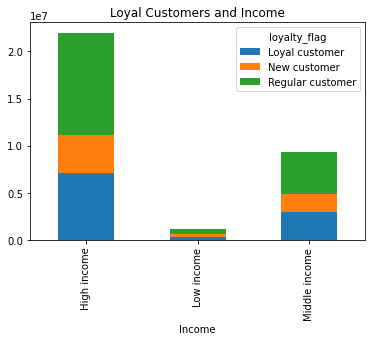

In [45]:
# Creating a stacked bar chart showing loyal customers and their level of income
bar_loyal_income = ctab_loyal_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title ('Loyal Customers and Income')
plt.xlabel('Income')

In [46]:
# Creating a crosstab between age groups and income
age_group_income = pd.crosstab(df_merged['age_group'], df_merged['income_group'], dropna = False)

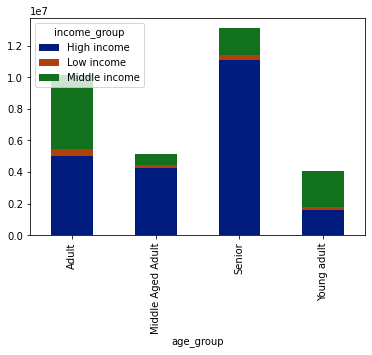

In [47]:
# Creating a stacked bar chart showing age groups and level of income
bar_age_income = age_group_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('dark'))

Text(0, 0.5, 'Order Frequency')

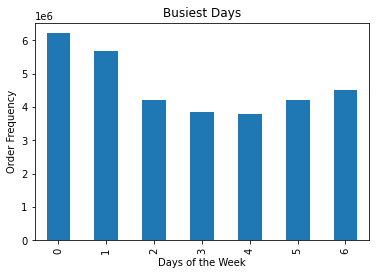

In [48]:
# Bar chart representing busiest days of the week
bar_busiest_days = df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Busiest Days')
plt.xlabel('Days of the Week')
plt.ylabel('Order Frequency')

Text(0, 0.5, 'Order Frequency')

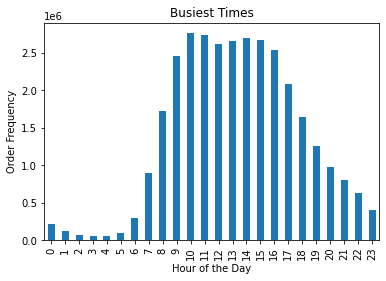

In [49]:
# Bar chart representing busiest times of the day
bar_busiest_time = df_merged['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Busiest Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Frequency')

Text(0, 0.5, 'Number of Orders')

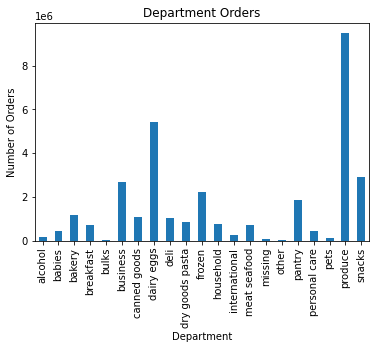

In [50]:
# Bar chart showing department orders
bar_dept_orders = df_merged['dept_type'].value_counts().sort_index().plot.bar()
plt.title('Department Orders')
plt.xlabel('Department')
plt.ylabel('Number of Orders')

# Aggregate the max, mean, and min vairables for usage frequency and expenditure

In [51]:
# Expenditure by age group
df_merged.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                        mean  min      max
age_group                                 
Adult              12.167161  1.0  99999.0
Middle Aged Adult  11.494826  1.0  99999.0
Senior             11.966969  1.0  99999.0
Young adult        12.176007  1.0  99999.0

In [52]:
# Expenditure by income
df_merged.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
High income    14.136879  1.0  99999.0
Low income      6.499866  1.0     25.0
Middle income   7.560668  1.0  14900.0

In [53]:
# Expenditure by region
df_merged.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.627875  1.0  99999.0
Northeast  11.556554  1.0  99999.0
South      12.196474  1.0  99999.0
West       11.490124  1.0  99999.0

In [54]:
# Expenditure by parental status
df_merged.groupby('dependent_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependent_flag                          
No dependents    12.130265  1.0  99999.0
Parent/Guardian  11.931712  1.0  99999.0

# Comparing customer profiles with regions and departments

# Loyal Customers

In [55]:
# Creating a crosstab between loyal customers and department
ctab_loyal_dept = pd.crosstab(df_merged['dept_type'], df_merged['loyalty_flag'], dropna = False)

Text(0, 0.5, 'Order Frequency')

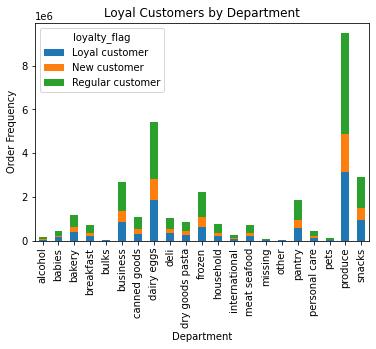

In [56]:
# Creating a stacked bar chart displaying ctab_loyal_dept
bar_loyal_dept = ctab_loyal_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Loyal Customers by Department')
plt.xlabel('Department')
plt.ylabel('Order Frequency')

In [74]:
# Exporting bar chart 
bar_loyal_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyal_dept.png'))

In [57]:
# Creating a crosstab between loyal customers and region
ctab_loyal_region = pd.crosstab(df_merged['region'], df_merged['loyalty_flag'], dropna = False)

Text(0, 0.5, 'Order Frequency')

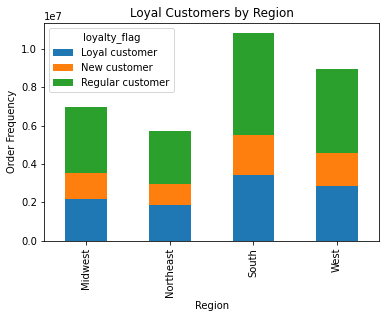

In [58]:
# Creating a stacked bar chart showing ctab_loyal_region
bar_loyal_region = ctab_loyal_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Loyal Customers by Region')
plt.xlabel('Region')
plt.ylabel('Order Frequency')

In [ ]:
# Exporting bar chart
bar_loyal_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyal_region.png'))

# Region

In [61]:
# Creating a crosstab between department and region
ctab_region_dept = pd.crosstab(df_merged['dept_type'], df_merged['region'], dropna = False)

Text(0, 0.5, 'Order Frequency')

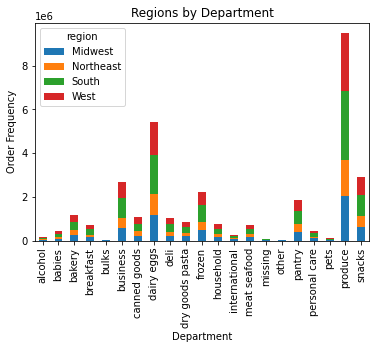

In [62]:
# Creating a stacked bar chart showing ctab_region_dept
bar_region_dept = ctab_region_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Regions by Department')
plt.xlabel('Department')
plt.ylabel('Order Frequency')

In [80]:
# Exporting bar chart
bar_region_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_region_dept.png'))

# Parental Status 

In [63]:
# Creating a crosstab between parental status and region
ctab_ps_region = pd.crosstab(df_merged['region'], df_merged['dependent_flag'], dropna = False)

Text(0, 0.5, 'Order Frequency')

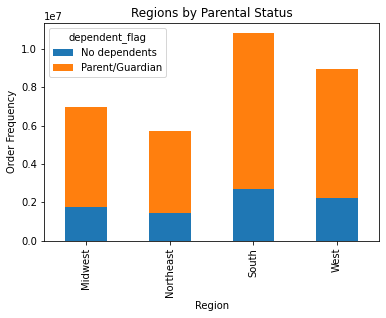

In [64]:
# Creating a stacked bar chart showing ctab_ps_region
bar_ps_region = ctab_ps_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Regions by Parental Status')
plt.xlabel('Region')
plt.ylabel('Order Frequency')

In [85]:
# Exporting bar chart
bar_ps_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_ps_region.png'))

In [65]:
# Creating a crosstab between parental status and department
ctab_ps_dept = pd.crosstab(df_merged['dept_type'], df_merged['dependent_flag'], dropna = False)

Text(0, 0.5, 'Order Frequency')

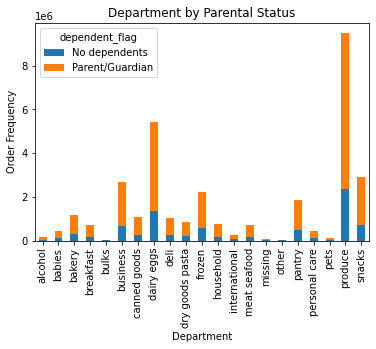

In [66]:
# Creating a stacked bar chart showing ct_ps_dept
bar_ps_dept = ctab_ps_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Department by Parental Status')
plt.xlabel('Department')
plt.ylabel('Order Frequency')

In [87]:
# Exporting bar chart
bar_ps_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_ps_dept.png'))

# Age

In [67]:
# Creating a crosstab between age and departments
ctab_age_dept = pd.crosstab(df_merged['dept_type'], df_merged['age_group'], dropna = False)

Text(0, 0.5, 'Order Frequency')

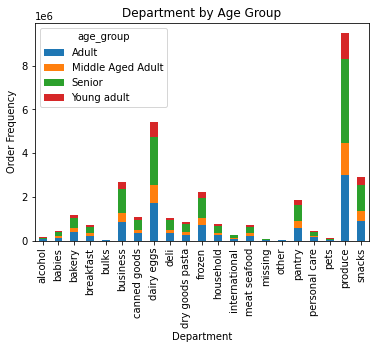

In [68]:
# Creating a stacked bar chart showing ctab_age_dept
bar_age_dept = ctab_age_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Department by Age Group')
plt.xlabel('Department')
plt.ylabel('Order Frequency')

In [91]:
# Exporting bar chart
bar_age_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_age_dept.png'))

In [69]:
# Creating a crosstab between age and region
ctab_age_region = pd.crosstab(df_merged['region'], df_merged['age_group'], dropna = False)

Text(0, 0.5, 'Order Frequency')

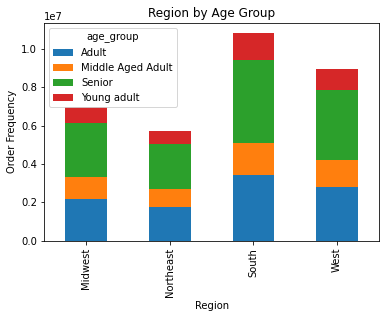

In [70]:
# Creating a stacked bar chart showing ctab_age_region
bar_age_region = ctab_age_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Region by Age Group')
plt.xlabel('Region')
plt.ylabel('Order Frequency')

In [94]:
# Exporting bar chart
bar_age_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_age_region.png'))

# Income

In [71]:
# Creating a crosstab between income and department 
ctab_dept_income = pd.crosstab(df_merged['dept_type'], df_merged['income_group'], dropna = False)

Text(0, 0.5, 'Order Frequency')

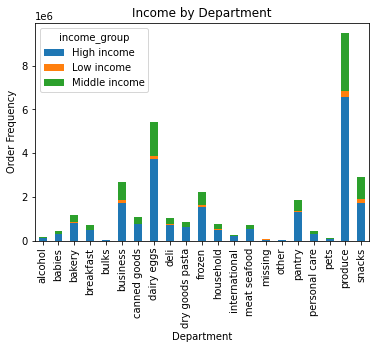

In [72]:
# Creating a stacked bar chart showing ctab_age_income
bar_dept_income = ctab_dept_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Income by Department')
plt.xlabel('Department')
plt.ylabel('Order Frequency')

In [98]:
# Exporting bar chart
bar_dept_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_dept_income.png'))

In [73]:
# Creating a crosstab between income and region
ctab_income_region = pd.crosstab(df_merged['income_group'], df_merged['region'], dropna = False)

Text(0, 0.5, 'Order Frequency')

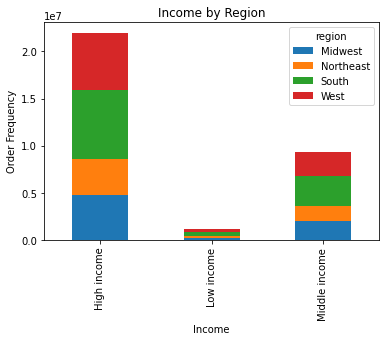

In [74]:
# Creating a stacked bar chart showing ctab_income_region
bar_income_region = ctab_income_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('tab10'))
plt.title('Income by Region')
plt.xlabel('Income')
plt.ylabel('Order Frequency')

In [ ]:
# Exporting bar chart
bar_income_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_income_region.png'))

In [41]:
# Exporting new dataset
df_merged.to_pickle(os.path.join(path, 'Data','Prepared Data', 'final_dataset.pkl'))